In [1]:
import numpy as np

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: import numpy
           ^


Dla macierzy o rozmiarze mniejszym lub równym 2l × 2l algorytm tradycyjny. 
Dla macierzy o rozmiarze większym od 2l × 2l algorytm rekurencyjny Binéta.

1. Algorytm tradycyjny:

In [2]:
classic_multiplication <- function(mtr1, mtr2) {
  # Number of operations: +-* /
  flops <- 0
  
  sum <- 0
  
  # The shape of the result matrix will be: <number of rows from the first matrix> x <number of columns from the second matrix>
  result_matrix <- matrix(0, nrow = nrow(mtr1), ncol = ncol(mtr2))
  
  # Number of columns in the first matrix = number of rows in the second matrix
  # (this variable will help us with the most inner iteration)
  size <- ncol(mtr1)
  
  # Iterate over rows of the first matrix
  for (i in 1:nrow(mtr1)) {
    
    # Iterate over columns of the second matrix
    for (j in 1:ncol(mtr2)) {
      
      # "k" denotes columns in the first matrix and rows in the second matrix
      for (k in 1:size) {
        
        sum <- sum + mtr1[i, k] * mtr2[k, j]
        flops <- flops + 2
        
      }
      
      result_matrix[i, j] <- sum
      sum <- 0
      
    }
  }
  
  # Return a list containing the result matrix and the number of operations
  return(list(result_matrix, flops))
}

In [3]:
# Example usage with two matrices
# Macierze M1 i M2
M1 <- matrix(c(1, 2, 3, 4, 5, 6), nrow = 2, ncol = 3)
M2 <- matrix(c(1, 2, 3, 4, 5, 6, 1, 2, 1), nrow = 3, ncol = 3)

# Display matrices
print(M1)
print(M2)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
     [,1] [,2] [,3]
[1,]    1    4    1
[2,]    2    5    2
[3,]    3    6    1


In [4]:
result <- classic_multiplication(M1, M2)
print(result[[1]])  # Result matrix
print(result[[2]])  # Number of operations


     [,1] [,2] [,3]
[1,]   22   49   12
[2,]   28   64   16
[1] 36


2. Algorytm Strassena

In [26]:
strassen_multiplication <- function(A, B, l) {
  n <- nrow(A)
  # Number of operations: +-* /
  flops <- 0
  
  # base condition
  if (n <= 2^l) {
    return(classic_multiplication(A, B))
  }
  
  # division into "sub" matrices
  new_size <- n %/% 2
  A11 <- A[1:new_size, 1:new_size]
  A12 <- A[1:new_size, (new_size + 1):n]
  A21 <- A[(new_size + 1):n, 1:new_size]
  A22 <- A[(new_size + 1):n, (new_size + 1):n]
  
  B11 <- B[1:new_size, 1:new_size]
  B12 <- B[1:new_size, (new_size + 1):n]
  B21 <- B[(new_size + 1):n, 1:new_size]
  B22 <- B[(new_size + 1):n, (new_size + 1):n]
  
  # Recursive multiplication of matrices
  P1 <- strassen_multiplication(A11 + A22, B11 + B22, l)
  P2 <- strassen_multiplication(A21 + A22, B11, l)
  P3 <- strassen_multiplication(A11, B12 - B22, l)
  P4 <- strassen_multiplication(A22, B21 - B11, l)
  P5 <- strassen_multiplication(A11 + A12, B22, l)
  P6 <- strassen_multiplication(A21 - A11, B11 + B12, l)
  P7 <- strassen_multiplication(A12 - A22, B21 + B22, l)
  
  flops <- flops + P1[[2]] + P2[[2]] + P3[[2]] + P4[[2]] + P5[[2]] + P6[[2]] + P7[[2]] 
  
  # formula from the lecture
  C11 <- P1[[1]] + P4[[1]] - P5[[1]] + P7[[1]]
  C12 <- P3[[1]] + P5[[1]]
  C21 <- P2[[1]] + P4[[1]]
  C22 <- P1[[1]] - P2[[1]] + P3[[1]] + P6[[1]]
  
  flops <- flops + 18
  
  # joining results into one matrix
  result <- matrix(0, n, n)
  result[1:new_size, 1:new_size] <- C11
  result[1:new_size, (new_size + 1):n] <- C12
  result[(new_size + 1):n, 1:new_size] <- C21
  result[(new_size + 1):n, (new_size + 1):n] <- C22
  
  return(list(result, flops))
}

In [27]:
A <- matrix(c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16), nrow = 4)
B <- matrix(c(17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32), nrow = 4)

Proszę przygotować następujący raport

Proszę opisać pseudo-kod swojego rekurencyjnego mnożenia macierzy 
(uwzględniając dwa poziomy swojego algorytmu)

Proszę narysować wykres: oś pozioma rozmiar macierzy
2k ×2k dlak=2,3,4,...,16(ilesięuda), oś pionowaczas mnożenia swoją metodą rekurencyjną. 

Proszę narysować różne wykresy dla wybranych l z przedziału 2 < l < k.

Proszę narysować wykres: oś pozioma rozmiar macierzy 2k × 2k dla k=2,3,4,...,16 (ile się uda),
oś pionowa liczba operacji zmienno-kierunkowych swoją metodą rekurencyjną. 

Proszę narysować różne wykresy dla wybranych l z przedziału 2 < l < k.

1. funkcja, której argumentem jest rozmiar macierzy i wypełnia macierz losowymi wartosciami (od 0 do 9) 
2. wewnątrz wstawiamy strassen_multiplication 
3. w celu wykonania trzeciego wykresu od czasu uzywamy system.time(funkcja())
4. jeśli chodzi o drugi wykres to strassen zwraca flops

for (k, funkcja(k)[[2]], system.time(funkcja(k))

dla l = 2:




In [29]:
multiplication <- function(k, l) {
    nrow <- 2^k
    ncol <- 2^k
    A <- matrix(sample(0:9, nrow * ncol, replace = TRUE), nrow)
    B <- matrix(sample(0:9, nrow * ncol, replace = TRUE), nrow)
    
    result <- strassen_multiplication(A, B, l)
    return(result)
}

In [37]:
system.time(multiplication(5, 2))[3]

elapsed 
  0.009

In [65]:
y_1 <- c()
y_2 <- c()
x <- c()

for (i in 2:10) {
    x <- c(x, 2^i)
    y_1 <- c(y_1, multiplication(i, 2)[[2]]) 
    y_2 <- c(y_2, system.time(multiplication(i, 2))[3])
}

In [67]:
df <- data.frame(size = x, flops = y_1, time = y_2)

In [68]:
df

size,flops,time
4,128,0.000
8,914,0.000
16,6416,0.001
32,44930,0.007
64,314528,0.049
128,2201714,0.357
256,15412016,2.543
512,107884130,18.109
1024,755188928,130.182


Warning message in title(...):
“conversion failure on 'Wykres zależności ilości operacji od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in title(...):
“conversion failure on 'Wykres zależności ilości operacji od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in title(...):
“conversion failure on 'Wykres zależności ilości operacji od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in title(...):
“conversion failure on 'Wykres zależności ilości operacji od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <9b>”Warning message in title(...):
“conversion failure on 'Wykres zależności ilości operacji od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in title(...):
“conversion failure on 'Wykres zależności ilości operacji od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <9b>”

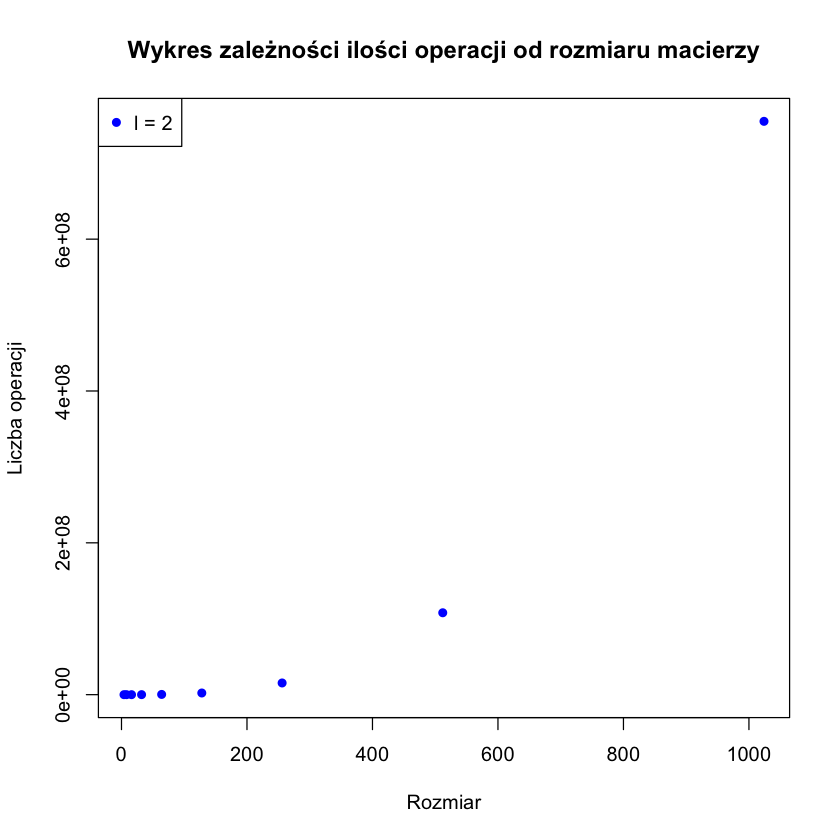

In [101]:
plot(df$size, df$flops, 
     main = "Wykres zależności ilości operacji od rozmiaru macierzy",
     xlab = "Rozmiar",
     ylab = "Liczba operacji",
     pch = 16,  # Styl punktów
     col = "blue",  # Kolor punktów
)
legend("topleft", legend = "l = 2", col = "blue", pch = 16)

Warning message in title(...):
“conversion failure on 'Wykres zależności czasu od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in title(...):
“conversion failure on 'Wykres zależności czasu od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in title(...):
“conversion failure on 'Wykres zależności czasu od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <c5>”Warning message in title(...):
“conversion failure on 'Wykres zależności czasu od rozmiaru macierzy' in 'mbcsToSbcs': dot substituted for <9b>”

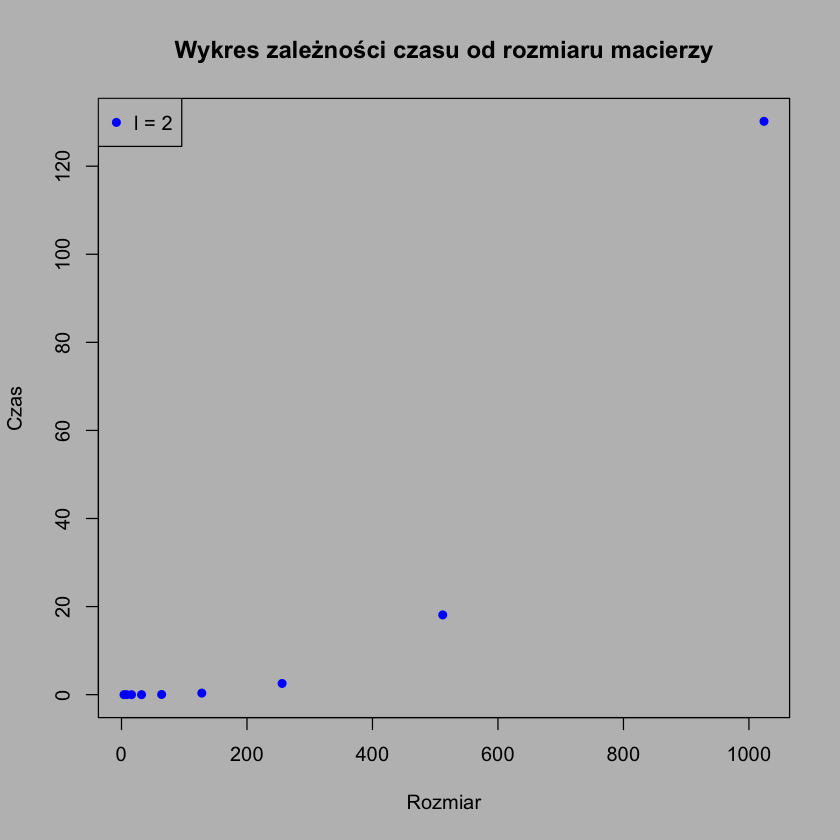

In [100]:
par(bg="gray")
plot(df$size, df$time,
     main = "Wykres zależności czasu od rozmiaru macierzy",
     xlab = "Rozmiar",
     ylab = "Czas",
     pch = 16,  # Styl punktów
     col = "blue",  # Kolor punktów
)
legend("topleft", legend = "l = 2", col = "blue", pch = 16)

In [85]:
.libPaths()

[1] "/Users/ewa/anaconda3/envs/r-kernel/lib/R/library"